# ENGR 424 Machine Learning Project

 Name: Yousif Robeil<br>
 ID: 23-00076

## Project Description
This is a project for the class Machine Learning ENGR 424. The Aim of the project is to predict mean, min, and max temperature of a given region, and use the data to predict hourly temperature data. Which will be displayed on an ESP 32 powered console 

## Project Stages:
1. ML PIPELINE to Predict min, mean, and max temperatures.
1. Use the predictions to generate hourly temperature data.
1. Display The Results on ESP 32 Powered Console

This Notebook is dedicated for the first stage.

<br><br><br><br><br>

## Machine Learning Pipeline

1. Importing the data
2. Plotting the data with distribution and descriptive statistics
3. Splitting the Data for Training, Validation, Testing, will do 60-20-20
4. Outlier Treatment Detection, through IQR or Z-score analysis
5. Regularization, moving average or z score
6. Normalization/Standardization z-score or minmax scaler
7. Feature engineering, check for frequency features and pca and autocorrelation
8. Feature Selection and correlation Study, statistical methods through ANOVA
9. ML Model Code 
10. Train the Model
11. Hyperparameter Tuning
12. Model Evaluation, through evluation metrics and prediction intervals
13. Evaluating Goodness of fit, kolmogorov-smirnov or Andirson-Darling test or Shapiro-Wilk test
14. Consider Data augmentation if there is overfitting<br><br><br>

### Variable Index:

In [368]:
"""
1- Data:  containing the original imported Data. Data frame
2- Data_copy: Copy of imported data, this is the variable that will be manipulated. Data frame
3- Y: This represents the target variable with date as index. Data frame
4- fig, axs: creating instances for subplots
5- avg_mean_temp: the average of the daily mean temperature. float
6- Train_Cent: the percentage of Training data with respect to total data. float
7- Vald_Cent: the percentage of Validation data with respect to total data. float
8- Test_Cent: the percentage of Testing data with respect to total data. float
9- Data_Size: The size of the data. int 
10- Train_Lim: The index where Training data stop. int
11- Vald_Lim: The index where Validation data stop. int
12- Test_Lim: The index where Testing data stop. int
13- Data_Train: Splitting Data into Training Data. Data frame
14- Data_Vald: Splitting Data into Validation Data. Data frame
15- Data_Test: Splitting Data into Testing Data. Data frame
16- Train_Temp_Max: The daily Max Temp feature of the data. Data frame
17- Train_Temp_Min: The daily Min Temp feature of the data. Data frame
18- Train_Temp_Mean: The daily Mean Temp feature of the data. Data frame
19- Train_Prec_Sum: The daily Precipitation Sum feature of the data. Data frame
20- Train_Windsp_Max: The daily Max Windspeed feature of the data. Data frame
21- Train_Windgu_Max: The daily Max Windgusts feature of the data. Data frame
22- Train_Sunsh_Dur: The daily Sunshine Duration feature of the data. Data frame
"""

'\n1- Data:  containing the original imported Data. Data frame\n2- Data_copy: Copy of imported data, this is the variable that will be manipulated. Data frame\n3- Y: This represents the target variable with date as index. Data frame\n4- fig, axs: creating instances for subplots\n5- avg_mean_temp: the average of the daily mean temperature. float\n6- Train_Cent: the percentage of Training data with respect to total data. float\n7- Vald_Cent: the percentage of Validation data with respect to total data. float\n8- Test_Cent: the percentage of Testing data with respect to total data. float\n9- Data_Size: The size of the data. int \n10- Train_Lim: The index where Training data stop. int\n11- Vald_Lim: The index where Validation data stop. int\n12- Test_Lim: The index where Testing data stop. int\n13- Data_Train: Splitting Data into Training Data. Data frame\n14- Data_Vald: Splitting Data into Validation Data. Data frame\n15- Data_Test: Splitting Data into Testing Data. Data frame\n16- Train_

### 1. Importing the data:


In [370]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Data = pd.read_csv("ML Project/Argentina_weather_data.csv")
Data_copy = Data.copy()
Data_copy.drop("Country",axis=1,inplace=True)
Data_copy['Date'] = pd.to_datetime(Data_copy['Date'],format='%d-%m-%Y')
Data_copy.set_index(Data_copy['Date'], inplace=True)
Data_copy.drop("Date",axis=1,inplace=True)

Y = Data_copy[["Temp_Max","Temp_Mean", "Temp_Min"]]
print(Data_copy.head())

            Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  Windspeed_Max  \
Date                                                                          
2000-01-01      33.9      20.7       27.5                0.0           17.9   
2000-01-02      32.9      22.2       27.3                0.6           23.1   
2000-01-03      32.1      21.0       26.9                0.0           20.6   
2000-01-04      32.2      20.9       26.7                0.0           25.1   
2000-01-05      30.5      21.0       25.7                0.0           23.7   

            Windgusts_Max  Sunshine_Duration  
Date                                          
2000-01-01           32.8           49047.75  
2000-01-02           43.6           48969.22  
2000-01-03           40.7           48921.57  
2000-01-04           47.2           48091.20  
2000-01-05           45.4           48922.09  


<br><br><br>

### 2. Plotting the data with distribution and descriptive statistics and Time Series Decomposition

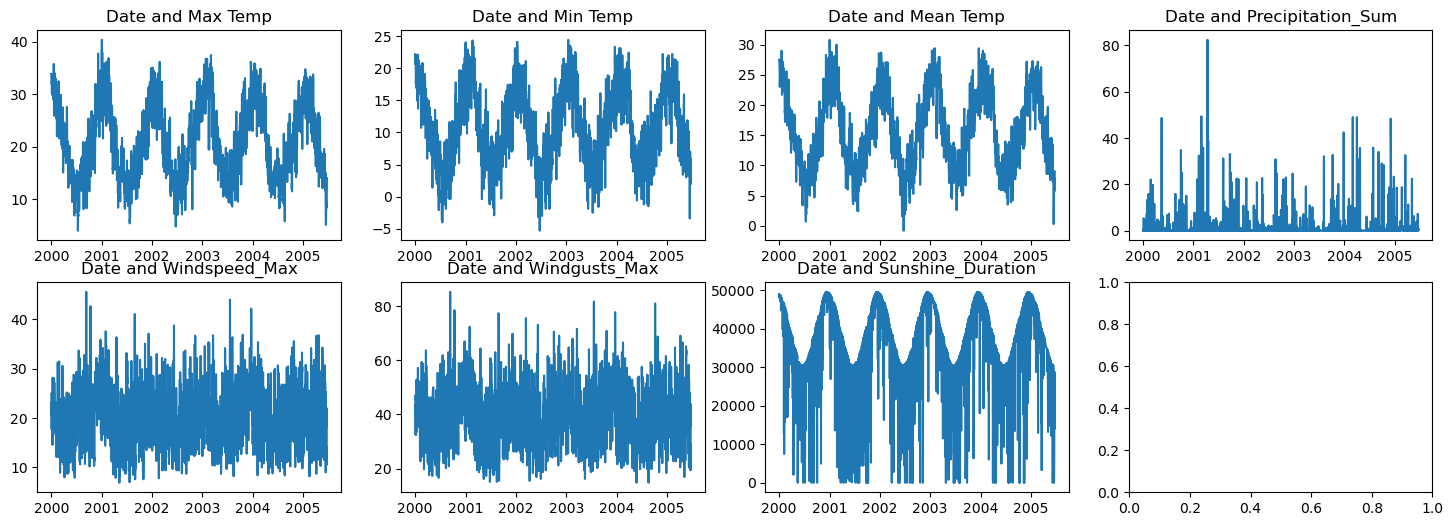

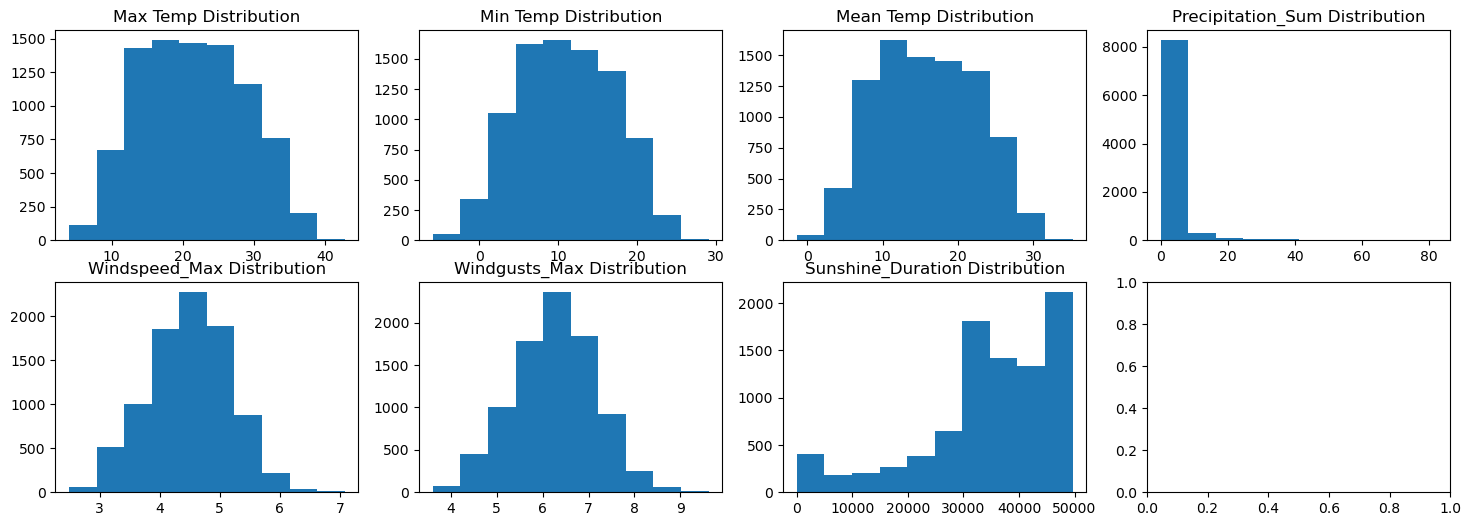

          Temp_Max     Temp_Min    Temp_Mean  Precipitation_Sum  \
count  8766.000000  8766.000000  8766.000000        8766.000000   
mean     21.448517    10.953091    15.938182           1.491901   
std       7.252082     6.082416     6.583756           5.078362   
min       4.000000    -5.900000    -1.400000           0.000000   
25%      15.600000     6.200000    10.600000           0.000000   
50%      21.300000    10.800000    15.700000           0.000000   
75%      27.100000    15.700000    21.300000           0.300000   
max      42.700000    29.100000    35.200000          82.300000   

       Windspeed_Max  Windgusts_Max  Sunshine_Duration  
count    8766.000000    8766.000000        8766.000000  
mean       20.689014      40.117305       34615.274984  
std         6.114128      11.261959       12322.007295  
min         6.200000      13.000000           0.000000  
25%        16.300000      32.000000       30437.920000  
50%        20.500000      39.600000       36156.110000

In [373]:
# Plotting the data
fig, axs = plt.subplots(2, 4, figsize=(18, 6))

axs[0,0].set_title("Date and Max Temp")
axs[0,0].plot(Data_copy["Temp_Max"].iloc[0:2000])

axs[0,1].set_title("Date and Min Temp")
axs[0,1].plot(Data_copy["Temp_Min"].iloc[0:2000])

axs[0,2].set_title("Date and Mean Temp")
axs[0,2].plot(Data_copy["Temp_Mean"].iloc[0:2000])


axs[0,3].set_title("Date and Precipitation_Sum")
axs[0,3].plot(Data_copy["Precipitation_Sum"].iloc[0:2000])

axs[1,0].set_title("Date and Windspeed_Max")
axs[1,0].plot(Data_copy["Windspeed_Max"].iloc[0:2000])


axs[1,1].set_title("Date and Windgusts_Max")
axs[1,1].plot(Data_copy["Windgusts_Max"].iloc[0:2000])


axs[1,2].set_title("Date and Sunshine_Duration")
axs[1,2].plot(Data_copy["Sunshine_Duration"].iloc[0:2000])


plt.show()
print("\n\n\n\n")
# Plotting the distribution
fig, axs = plt.subplots(2, 4, figsize=(18, 6))


axs[0,0].set_title("Max Temp Distribution")
axs[0,0].hist(Data_copy["Temp_Max"], 10)

axs[0,1].set_title("Min Temp Distribution")
axs[0,1].hist(Data_copy["Temp_Min"], 10)

axs[0,2].set_title("Mean Temp Distribution")
axs[0,2].hist(Data_copy["Temp_Mean"], 10)


axs[0,3].set_title("Precipitation_Sum Distribution")
axs[0,3].hist(Data_copy["Precipitation_Sum"], 10)

axs[1,0].set_title("Windspeed_Max Distribution")
axs[1,0].hist(np.sqrt(Data_copy["Windspeed_Max"]), 10) # sqrt of the feature was considered because the original has skewed normal distribution


axs[1,1].set_title("Windgusts_Max Distribution")
axs[1,1].hist(np.sqrt(Data_copy["Windgusts_Max"]), 10) # sqrt of the feature was considered because the original has skewed normal distribution


axs[1,2].set_title("Sunshine_Duration Distribution")
axs[1,2].hist(Data_copy["Sunshine_Duration"], 10)

plt.show()


# Descriptive Statistics

avg_mean_temp = Data_copy.describe()
print(avg_mean_temp)


<br><br><br>

### 3. Splitting the Data for Training, Validation, Testing, will do 60-20-20 in case of splits

In [376]:
Train_Cent = 60/100
Vald_Cent = 20/100
Test_Cent = 20/100
Data_Size = Data_copy.shape[0]
print(f"Data Size is: {Data_Size}")

Train_Lim = int(Train_Cent * Data_Size)
Vald_Lim = int(Train_Lim + Vald_Cent * Data_Size)
Test_Lim = int(Train_Lim + Vald_Lim + Test_Cent * Data_Size)


print("----------------------------------------------------------------------------------------------------")
Data_Train = Data_copy.iloc[:Train_Lim,:]
print(f"Training Data End:\n{Data_Train.tail()}\n\n")
Data_Vald = Data_copy.iloc[Train_Lim:Vald_Lim,:]
print(f"Validation Data End:\n {Data_Vald.tail()}\n\n")
Data_Test = Data_copy.iloc[Vald_Lim:Test_Lim+1,:]
print(f"Testing Data End:\n{Data_Test.tail()}")
print("----------------------------------------------------------------------------------------------------")



Data Size is: 8766
----------------------------------------------------------------------------------------------------
Training Data End:
            Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  Windspeed_Max  \
Date                                                                          
2014-05-21       9.0       7.7        8.2               17.7           17.1   
2014-05-22      11.3       6.4        8.3                0.0           27.0   
2014-05-23      11.9       2.1        6.5                0.0           22.8   
2014-05-24      14.1       3.5        8.0                0.0           15.8   
2014-05-25      16.3       6.7       10.1                0.0           18.3   

            Windgusts_Max  Sunshine_Duration  
Date                                          
2014-05-21           28.4               0.00  
2014-05-22           50.0           23887.49  
2014-05-23           43.6           31626.23  
2014-05-24           31.7           31491.05  
2014-05-25           33.1

In [377]:
# will be used later for more advanced validation


from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error
import numpy as np

# Define number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
# Iterate over train-test splits and train models
for train_index, test_index in tscv.split(Data_copy):
    train_data, test_data = Data_copy.iloc[train_index], Data_copy.iloc[test_index]


<br><br><br>

### 3.1 Partitioning The Training Data for processing

In [380]:
# Partitioning the data into date feature pairs for processing

# Temp_Max
Train_Temp_Max = pd.DataFrame({"Temp_Max": Data_Train["Temp_Max"]})
Train_Temp_Max.set_index(Data_Train.index, inplace=True)
Test_Temp_Max = pd.DataFrame({"Temp_Max": Data_Test["Temp_Max"]})
Test_Temp_Max.set_index(Data_Test.index, inplace=True)
Test_Temp_Max.head()
#-------------------------------------------------------------------------------------------------------------------

# Temp_Min
Train_Temp_Min = pd.DataFrame({"Temp_Min": Data_Train["Temp_Min"]})
Train_Temp_Min.set_index(Data_Train.index, inplace=True)
Test_Temp_Min = pd.DataFrame({"Temp_Min": Data_Test["Temp_Min"]})
Test_Temp_Min.set_index(Data_Test.index, inplace=True)
Train_Temp_Min.head()
#-------------------------------------------------------------------------------------------------------------------

# Temp_Mean
Train_Temp_Mean = pd.DataFrame({"Temp_Mean": Data_Train["Temp_Mean"]})
Train_Temp_Mean.set_index(Data_Train.index, inplace=True)

Test_Temp_Mean = pd.DataFrame({"Temp_Mean": Data_Test["Temp_Mean"]})
Test_Temp_Mean.set_index(Data_Test.index, inplace=True)

Train_Temp_Mean.head()
#-------------------------------------------------------------------------------------------------------------------

# Precipitaiton_Sum
Train_Prec_Sum = pd.DataFrame({"Precipitation_Sum": Data_Train["Precipitation_Sum"]})
Train_Prec_Sum.set_index(Data_Train.index, inplace=True)
Test_Prec_Sum = pd.DataFrame({"Precipitation_Sum": Data_Test["Precipitation_Sum"]})
Test_Prec_Sum.set_index(Data_Test.index, inplace=True)

Train_Prec_Sum.head()
#-------------------------------------------------------------------------------------------------------------------

# Windspeed_Max
Train_Windsp_Max = pd.DataFrame({"Windspeed_Max": np.sqrt(Data_Train["Windspeed_Max"])})
Train_Windsp_Max.set_index(Data_Train.index, inplace=True)
Test_Windsp_Max = pd.DataFrame({"Windspeed_Max": np.sqrt(Data_Test["Windspeed_Max"])})
Test_Windsp_Max.set_index(Data_Test.index, inplace=True)

Train_Windsp_Max.head()
#-------------------------------------------------------------------------------------------------------------------


# Windgusts_Max
Train_Windgu_Max = pd.DataFrame({"Windgusts_Max": np.sqrt(Data_Train["Windgusts_Max"])})
Train_Windgu_Max.set_index(Data_Train.index, inplace=True)
Test_Windgu_Max = pd.DataFrame({"Windgusts_Max": np.sqrt(Data_Test["Windgusts_Max"])})
Test_Windgu_Max.set_index(Data_Test.index, inplace=True)

Train_Windgu_Max.head()
#-------------------------------------------------------------------------------------------------------------------

#Sunshine_Duration
Train_Sunsh_Dur = pd.DataFrame({"Sunshine_Duration":Data_Train["Sunshine_Duration"]})
Train_Sunsh_Dur.set_index(Data_Train.index, inplace=True)
Test_Sunsh_Dur = pd.DataFrame({"Sunshine_Duration":Data_Test["Sunshine_Duration"]})
Test_Sunsh_Dur.set_index(Data_Test.index, inplace=True)

Train_Sunsh_Dur.head()
#-------------------------------------------------------------------------------------------------------------------







,Sunshine_Duration
Date,
2000-01-01,49047.75
2000-01-02,48969.22
2000-01-03,48921.57
2000-01-04,48091.20
2000-01-05,48922.09


<br><br><br>

### 4. Outlier Detection & Treatment, through IQR or Z-score analysis

3.7761802017930473


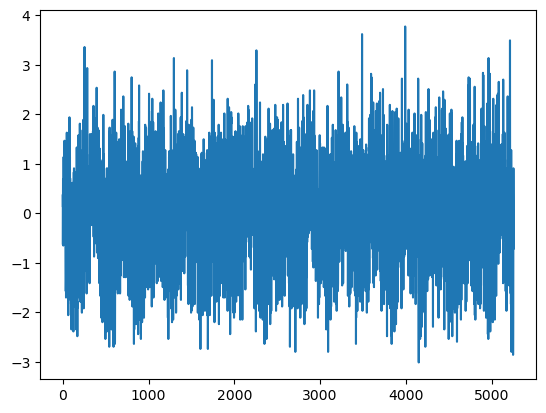

In [383]:
"""
Z-score will be used to detect outliers for Normally Distributed Data
IQR will be used to detect outliers for other types of data
"""

# Z-score Outlier Detection

from scipy.stats import zscore
Train_Windgu_Max_Zscore = pd.DataFrame({"Z-score":zscore(Train_Windgu_Max["Windgusts_Max"])})
Train_Windgu_Max_Zscore.set_index(Train_Windgu_Max_Zscore.index, inplace=True)
print(Train_Windgu_Max_Zscore["Z-score"].max())
plt.plot(Train_Windgu_Max_Zscore["Z-score"])
plt.show()

<br><br><br>

### 5. Regularization, moving average or z score (Smoothing)

In [386]:
Clean_Training_Data = pd.DataFrame({"Temp_Max":Train_Temp_Max["Temp_Max"], "Temp_Min":Train_Temp_Min["Temp_Min"], "Temp_Mean":Train_Temp_Mean["Temp_Mean"], "Precipitation_Sum":Train_Prec_Sum["Precipitation_Sum"], "Windspeed_Max":Train_Windsp_Max["Windspeed_Max"], "Windgusts_Max":Train_Windgu_Max["Windgusts_Max"] , "Sunshine_Duration":Train_Sunsh_Dur["Sunshine_Duration"] }) 
Train_Temp_Min.set_index(Data_Train.index, inplace=True)
Clean_Testing_Data = pd.DataFrame({"Temp_Max":Test_Temp_Max["Temp_Max"], "Temp_Min":Test_Temp_Min["Temp_Min"], "Temp_Mean":Test_Temp_Mean["Temp_Mean"], "Precipitation_Sum":Test_Prec_Sum["Precipitation_Sum"], "Windspeed_Max":Test_Windsp_Max["Windspeed_Max"], "Windgusts_Max":Test_Windgu_Max["Windgusts_Max"] , "Sunshine_Duration":Test_Sunsh_Dur["Sunshine_Duration"] }) 
Test_Temp_Min.set_index(Data_Test.index, inplace=True)

Clean_Training_Data.head()



,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration
Date,,,,,,,
2000-01-01,33.9,20.7,27.5,0.0,4.230839,5.727128,49047.75
2000-01-02,32.9,22.2,27.3,0.6,4.806246,6.603030,48969.22
2000-01-03,32.1,21.0,26.9,0.0,4.538722,6.379655,48921.57
2000-01-04,32.2,20.9,26.7,0.0,5.009990,6.870226,48091.20
2000-01-05,30.5,21.0,25.7,0.0,4.868265,6.737952,48922.09


<br><br><br>

### 6. Normalization/Standardization z-score or minmax scaler

In [389]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in Clean_Training_Data.columns:
    if i == "Date":
        continue

    Clean_Training_Data[i] = scaler.fit_transform(pd.DataFrame(Clean_Training_Data[i]))

Clean_Training_Data.head()

# Same for Testing Data

for i in Clean_Testing_Data.columns:
    if i == "Date":
        continue

    Clean_Testing_Data[i] = scaler.fit_transform(pd.DataFrame(Clean_Testing_Data[i]))

Clean_Testing_Data.head()


# Descriptive Statistics
dsc = Clean_Training_Data.describe()
print(dsc)


          Temp_Max     Temp_Min    Temp_Mean  Precipitation_Sum  \
count  5259.000000  5259.000000  5259.000000        5259.000000   
mean      0.476171     0.513300     0.513917           0.018582   
std       0.196450     0.186152     0.194599           0.063569   
min       0.000000     0.000000     0.000000           0.000000   
25%       0.317073     0.370821     0.356932           0.000000   
50%       0.476965     0.513678     0.510324           0.000000   
75%       0.626016     0.662614     0.672566           0.003645   
max       1.000000     1.000000     1.000000           1.000000   

       Windspeed_Max  Windgusts_Max  Sunshine_Duration  
count    5259.000000    5259.000000        5259.000000  
mean        0.436062       0.443642           0.702457  
std         0.147146       0.147348           0.246744  
min         0.000000       0.000000           0.000000  
25%         0.334545       0.342082           0.615737  
50%         0.444125       0.448143           0.733199

### 7. Feature engineering, check for frequency features and pca and autocorrelation

Correlation matrix is : 
                   Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  \
Temp_Max           1.000000  0.892917   0.973850          -0.010173   
Temp_Min           0.892917  1.000000   0.965072           0.153180   
Temp_Mean          0.973850  0.965072   1.000000           0.062768   
Precipitation_Sum -0.010173  0.153180   0.062768           1.000000   
Windspeed_Max      0.212962  0.267997   0.244228           0.081249   
Windgusts_Max      0.242386  0.303754   0.277619           0.122488   
Sunshine_Duration  0.654716  0.423399   0.572771          -0.332485   

                   Windspeed_Max  Windgusts_Max  Sunshine_Duration  
Temp_Max                0.212962       0.242386           0.654716  
Temp_Min                0.267997       0.303754           0.423399  
Temp_Mean               0.244228       0.277619           0.572771  
Precipitation_Sum       0.081249       0.122488          -0.332485  
Windspeed_Max           1.000000       0.954992           0.1

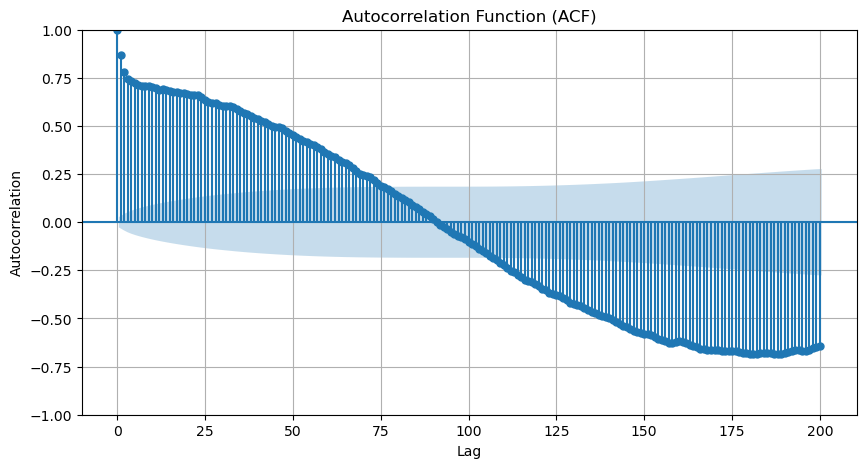

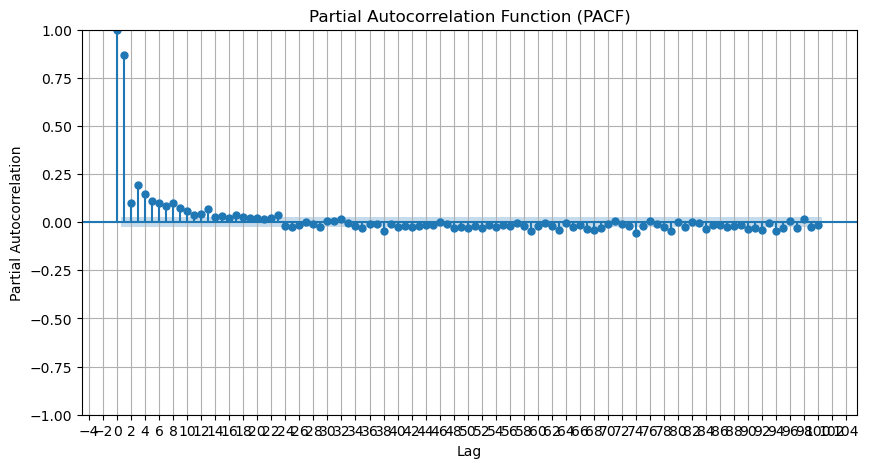


 Temp Max: 

The best moving average window according to ACF: 75
The best Lag features according to PACF: 1,3,4,5

 Temp Mean: 

The best moving average window according to ACF: 75
The best Lag features according to PACF: 1,2,3,5

 Temp Min: 

The best moving average window according to ACF: 75
The best Lag features according to PACF: 1,3,4
The peridoicity in the ACF plot indicate high seasonality, and the decay in the amplitude indicate non stationarity


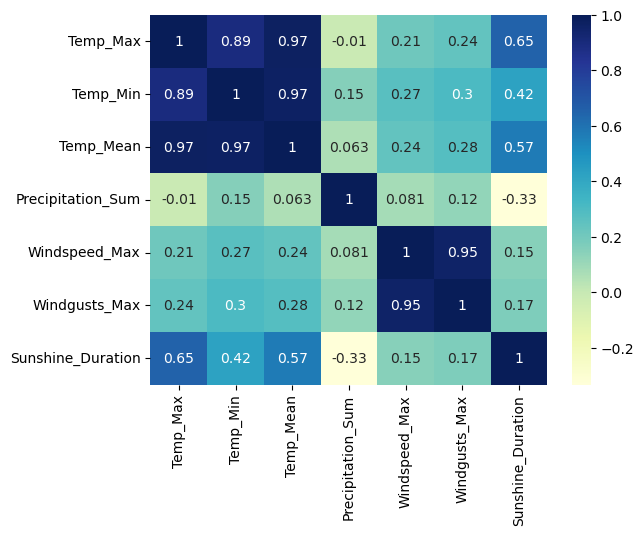

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


matrix = Clean_Training_Data.corr()
print("Correlation matrix is : ")
print(matrix)


"""
Applying ACF and PACF

ACF determines the window for moving average
PACF determines the lag features
"""

# Plot the ACF

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(Clean_Training_Data["Temp_Min"], lags=200, ax=ax) # Plot first 100 lags
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation Function (ACF)")
plt.grid()
plt.show() # Display the plot

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(Clean_Training_Data["Temp_Min"], lags=100, ax=ax, method='ywm') # Plot first 100 lags
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.set_xlabel("Lag")
ax.set_ylabel("Partial Autocorrelation")
ax.set_title("Partial Autocorrelation Function (PACF)")
plt.grid()
plt.show() # Display the plot


# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)

print(f"\n Temp Max: \n")
print(f"The best moving average window according to ACF: 75")
print(f"The best Lag features according to PACF: 1,3,4,5")

print(f"\n Temp Mean: \n")
print(f"The best moving average window according to ACF: 75")
print(f"The best Lag features according to PACF: 1,2,3,5")


print(f"\n Temp Min: \n")
print(f"The best moving average window according to ACF: 75")
print(f"The best Lag features according to PACF: 1,3,4")


print("The peridoicity in the ACF plot indicate high seasonality, and the decay in the amplitude indicate non stationarity")


#### 7.1 Feature Extraction

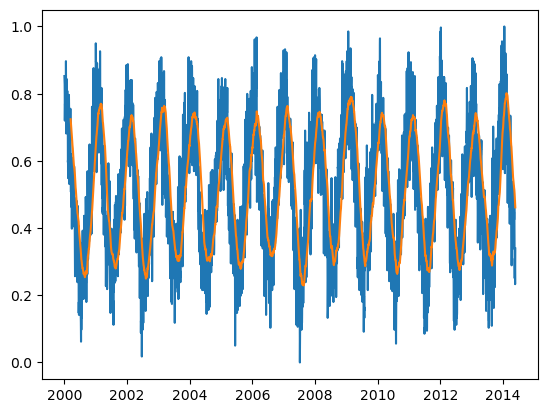

In [393]:
"""
Extracting Lag Features
We have 3 target variables, Temp_Max, Temp_Mean, and Temp_min
For each target variable, we will have Features Data Frame
"""

#-------------------------------------------------------------------------------------------------------------------

Temp_Max_Features = pd.DataFrame({
                                  "Temp_Min":Clean_Training_Data["Temp_Min"],
                                  "Temp_Mean":Clean_Training_Data["Temp_Mean"],
                                  "Windspeed_Max":Clean_Training_Data["Windspeed_Max"],
                                  "Windgusts_Max":Clean_Training_Data["Windgusts_Max"],
                                  "Sunshine_Duration":Clean_Training_Data["Sunshine_Duration"],
                                  "Lag_1":Clean_Training_Data["Temp_Max"].shift(1),
                                  "Lag_3":Clean_Training_Data["Temp_Max"].shift(3),
                                  "Lag_4":Clean_Training_Data["Temp_Max"].shift(4),
                                  "Lag_5":Clean_Training_Data["Temp_Max"].shift(5),
                                  "SMA":Clean_Training_Data["Temp_Max"].rolling(window=74).mean(),
                                  "EMA":Clean_Training_Data["Temp_Max"].ewm(halflife='37 days', times=Clean_Training_Data.index).mean()
                                            })

Test_Temp_Max_Features = pd.DataFrame({
                                  "Temp_Min":Clean_Testing_Data["Temp_Min"],
                                  "Temp_Mean":Clean_Testing_Data["Temp_Mean"],
                                  "Windspeed_Max":Clean_Testing_Data["Windspeed_Max"],
                                  "Windgusts_Max":Clean_Testing_Data["Windgusts_Max"],
                                  "Sunshine_Duration":Clean_Testing_Data["Sunshine_Duration"],
                                  "Lag_1":Clean_Testing_Data["Temp_Max"].shift(1),
                                  "Lag_3":Clean_Testing_Data["Temp_Max"].shift(3),
                                  "Lag_4":Clean_Testing_Data["Temp_Max"].shift(4),
                                  "Lag_5":Clean_Testing_Data["Temp_Max"].shift(5),
                                  "SMA":Clean_Testing_Data["Temp_Max"].rolling(window=74).mean(),
                                  "EMA":Clean_Testing_Data["Temp_Max"].ewm(halflife='37 days', times=Clean_Testing_Data.index).mean()
                                           })
#-------------------------------------------------------------------------------------------------------------------



Temp_Max_Features.set_index(Clean_Training_Data.index, inplace=True)

Temp_Mean_Features = pd.DataFrame({

                                  "Temp_Max":Clean_Training_Data["Temp_Max"],
                                  "Temp_Min":Clean_Training_Data["Temp_Min"],
                                  "Windspeed_Max":Clean_Training_Data["Windspeed_Max"],
                                  "Windgusts_Max":Clean_Training_Data["Windgusts_Max"],
                                  "Sunshine_Duration":Clean_Training_Data["Sunshine_Duration"],
                                  "Lag_1":Clean_Training_Data["Temp_Mean"].shift(1),
                                  "Lag_2":Clean_Training_Data["Temp_Mean"].shift(2),
                                  "Lag_3":Clean_Training_Data["Temp_Mean"].shift(3),
                                  "Lag_5":Clean_Training_Data["Temp_Mean"].shift(5),
                                  "SMA":Clean_Training_Data["Temp_Mean"].rolling(window=74).mean(),
                                  "EMA":Clean_Training_Data["Temp_Mean"].ewm(halflife='37 days', times=Clean_Training_Data.index).mean()
                                 })

Temp_Mean_Features.set_index(Clean_Training_Data.index, inplace=True)




Test_Temp_Mean_Features = pd.DataFrame({

                                  "Temp_Max":Clean_Testing_Data["Temp_Max"],
                                  "Temp_Min":Clean_Testing_Data["Temp_Min"],
                                  "Windspeed_Max":Clean_Testing_Data["Windspeed_Max"],
                                  "Windgusts_Max":Clean_Testing_Data["Windgusts_Max"],
                                  "Sunshine_Duration":Clean_Testing_Data["Sunshine_Duration"],
                                  "Lag_1":Clean_Testing_Data["Temp_Mean"].shift(1),
                                  "Lag_2":Clean_Testing_Data["Temp_Mean"].shift(2),
                                  "Lag_3":Clean_Testing_Data["Temp_Mean"].shift(3),
                                  "Lag_5":Clean_Testing_Data["Temp_Mean"].shift(5),
                                  "SMA":Clean_Testing_Data["Temp_Mean"].rolling(window=74).mean(),
                                  "EMA":Clean_Testing_Data["Temp_Mean"].ewm(halflife='37 days', times=Clean_Testing_Data.index).mean()
                                 })

Test_Temp_Mean_Features.set_index(Clean_Testing_Data.index, inplace=True)



#-------------------------------------------------------------------------------------------------------------------

Temp_Min_Features = pd.DataFrame({
                                  "Temp_Max":Clean_Training_Data["Temp_Max"],
                                  "Temp_Mean":Clean_Training_Data["Temp_Mean"],
                                  "Windspeed_Max":Clean_Training_Data["Windspeed_Max"],
                                  "Windgusts_Max":Clean_Training_Data["Windgusts_Max"],
                                  "Sunshine_Duration":Clean_Training_Data["Sunshine_Duration"],
                                  "Lag_1":Clean_Training_Data["Temp_Min"].shift(1),
                                  "Lag_3":Clean_Training_Data["Temp_Min"].shift(3),
                                  "Lag_4":Clean_Training_Data["Temp_Min"].shift(4),
                                  "SMA":Clean_Training_Data["Temp_Min"].rolling(window=74).mean(),
                                  "EMA":Clean_Training_Data["Temp_Min"].ewm(halflife='37 days', times=Clean_Training_Data.index).mean()
                                 })

Temp_Min_Features.set_index(Clean_Training_Data.index, inplace=True)


Test_Temp_Min_Features = pd.DataFrame({
                                  "Temp_Max":Clean_Testing_Data["Temp_Max"],
                                  "Temp_Mean":Clean_Testing_Data["Temp_Mean"],
                                  "Windspeed_Max":Clean_Testing_Data["Windspeed_Max"],
                                  "Windgusts_Max":Clean_Testing_Data["Windgusts_Max"],
                                  "Sunshine_Duration":Clean_Testing_Data["Sunshine_Duration"],
                                  "Lag_1":Clean_Testing_Data["Temp_Min"].shift(1),
                                  "Lag_3":Clean_Testing_Data["Temp_Min"].shift(3),
                                  "Lag_4":Clean_Testing_Data["Temp_Min"].shift(4),
                                  "SMA":Clean_Testing_Data["Temp_Min"].rolling(window=74).mean(),
                                  "EMA":Clean_Testing_Data["Temp_Min"].ewm(halflife='37 days', times=Clean_Testing_Data.index).mean()
                                 })

Test_Temp_Min_Features.set_index(Clean_Testing_Data.index, inplace=True)

                 
#-------------------------------------------------------------------------------------------------------------------





# Date Range is 01-01-2000 to 25-05-2014
Temp_Mean_Features
plt.plot(Clean_Training_Data["Temp_Mean"])
plt.plot(Temp_Mean_Features["SMA"])


In [394]:
Clean_Testing_Data.tail()

,Temp_Max,Temp_Min,Temp_Mean,Precipitation_Sum,Windspeed_Max,Windgusts_Max,Sunshine_Duration
Date,,,,,,,
2023-12-27,0.709239,0.602985,0.669540,0.009346,0.568447,0.609329,0.817629
2023-12-28,0.690217,0.695522,0.706897,0.000000,0.465574,0.523099,0.981744
2023-12-29,0.521739,0.588060,0.563218,0.000000,0.542962,0.551669,0.992214
2023-12-30,0.663043,0.546269,0.632184,0.000000,0.390575,0.424347,0.989303
2023-12-31,0.657609,0.695522,0.695402,0.000000,0.540619,0.583338,0.873537


##### 7.1.1 FFT

In [396]:
Fs = len(Clean_Training_Data["Temp_Mean"])
T = 1/Fs
t = np.arange(0, 1, T)  
Temp_Mean_Features["FFT"] = np.fft.fft(Clean_Training_Data["Temp_Mean"])
Temp_Max_Features["FFT"] = np.fft.fft(Clean_Training_Data["Temp_Max"])
Temp_Min_Features["FFT"] = np.fft.fft(Clean_Training_Data["Temp_Min"])
N = len(Clean_Training_Data["Temp_Mean"])

freq = np.fft.fftfreq(N, T)


# Calculate N/2 to normalize the FFT output
N = len(Clean_Training_Data["Temp_Mean"])
normalize = N/2

Temp_Mean_Features["FFT"] = np.abs(Temp_Mean_Features["FFT"])/normalize
Temp_Max_Features["FFT"] = np.abs(Temp_Max_Features["FFT"])/normalize
Temp_Min_Features["FFT"] = np.abs(Temp_Min_Features["FFT"])/normalize
magnitude = np.abs(Temp_Mean_Features["FFT"])


# Testing Data FFT

Fs = len(Clean_Testing_Data["Temp_Mean"])
T = 1/Fs
t = np.arange(0, 1, T)  
Test_Temp_Mean_Features["FFT"] = np.fft.fft(Clean_Testing_Data["Temp_Mean"])
Test_Temp_Max_Features["FFT"] = np.fft.fft(Clean_Testing_Data["Temp_Max"])
Test_Temp_Min_Features["FFT"] = np.fft.fft(Clean_Testing_Data["Temp_Min"])
N = len(Clean_Testing_Data["Temp_Mean"])

freq = np.fft.fftfreq(N, T)


# Calculate N/2 to normalize the FFT output
N = len(Clean_Testing_Data["Temp_Mean"])
normalize = N/2

Test_Temp_Mean_Features["FFT"] = np.abs(Test_Temp_Mean_Features["FFT"])/normalize
Test_Temp_Max_Features["FFT"] = np.abs(Test_Temp_Max_Features["FFT"])/normalize
Test_Temp_Min_Features["FFT"] = np.abs(Test_Temp_Min_Features["FFT"])/normalize
magnitude = np.abs(Test_Temp_Mean_Features["FFT"])



In [397]:
# Dropping NaNs

Temp_Mean_Features = Temp_Mean_Features.iloc[73:]
Temp_Max_Features = Temp_Max_Features.iloc[73:]
Temp_Min_Features = Temp_Min_Features.iloc[73:]



Test_Temp_Mean_Features = Test_Temp_Mean_Features.iloc[73:]
Test_Temp_Max_Features = Test_Temp_Max_Features.iloc[73:]
Test_Temp_Min_Features = Test_Temp_Min_Features.iloc[73:]

#Temp_Mean_Features.tail()

Test_Temp_Mean_Features.head()


,Temp_Max,Temp_Min,Windspeed_Max,Windgusts_Max,Sunshine_Duration,Lag_1,Lag_2,Lag_3,Lag_5,SMA,EMA,FFT
Date,,,,,,,,,,,,
2019-05-26,0.269022,0.304478,0.390575,0.434339,0.623514,0.313218,0.298851,0.270115,0.235632,0.439578,0.410242,0.009346
2019-05-27,0.269022,0.268657,0.289347,0.333025,0.626277,0.275862,0.313218,0.298851,0.227011,0.435384,0.406442,0.003160
2019-05-28,0.220109,0.292537,0.321375,0.381930,0.624255,0.255747,0.275862,0.313218,0.270115,0.431811,0.402267,0.007129
2019-05-29,0.095109,0.205970,0.109710,0.193207,0.143775,0.235632,0.255747,0.275862,0.298851,0.426608,0.396192,0.004634
2019-05-30,0.097826,0.289552,0.262324,0.304426,0.025094,0.152299,0.235632,0.255747,0.313218,0.421559,0.391132,0.003906


#### 7.2 Handling Multicolliniarity

#### 7.2.1 Finding omptimal number of Principal Components

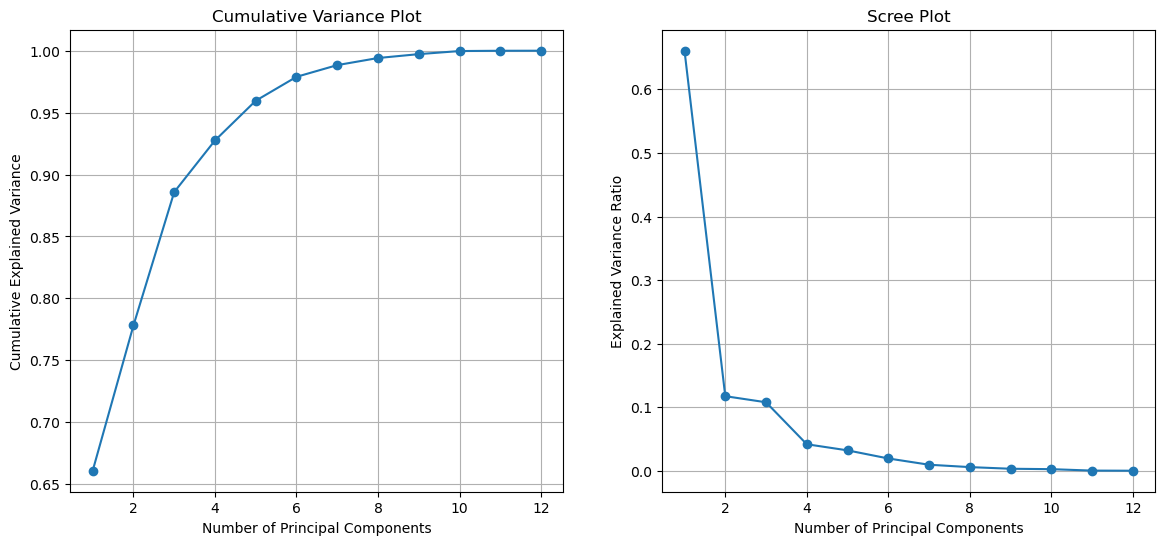

Optimal number of components for mean: 5
Optimal number of components for max: 5
Optimal number of components for min: 5


In [400]:
# APPLYING PCA 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


mean_PCA = PCA(n_components=len(Temp_Mean_Features.columns))
mean_PCA.fit(Temp_Mean_Features)

max_PCA = PCA(n_components=len(Temp_Max_Features.columns))
max_PCA.fit(Temp_Max_Features)

min_PCA = PCA(n_components=len(Temp_Min_Features.columns))
min_PCA.fit(Temp_Min_Features)


# Compute explained variance ratio
mean_explained_variance_ratio = mean_PCA.explained_variance_ratio_
mean_cumulative_variance = np.cumsum(mean_explained_variance_ratio)

max_explained_variance_ratio = max_PCA.explained_variance_ratio_
max_cumulative_variance = np.cumsum(max_explained_variance_ratio)

min_explained_variance_ratio = min_PCA.explained_variance_ratio_
min_cumulative_variance = np.cumsum(min_explained_variance_ratio)

# Find the optimal number of components (Elbow Method)
mean_optimal_k = np.argmax(mean_cumulative_variance >= 0.95) + 1  # First index where 95% variance is explained
max_optimal_k = np.argmax(max_cumulative_variance >= 0.95) + 1  # First index where 95% variance is explained
min_optimal_k = np.argmax(min_cumulative_variance >= 0.95) + 1  # First index where 95% variance is explained

# Create a figure with two subplots for Cumulative Variance Plot and Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cumulative Variance Plot
axes[0].plot(range(1, len(mean_explained_variance_ratio) + 1), mean_cumulative_variance, marker='o', linestyle='-')
axes[0].set_xlabel("Number of Principal Components")
axes[0].set_ylabel("Cumulative Explained Variance")
axes[0].set_title("Cumulative Variance Plot")
axes[0].grid()

# Scree Plot (Explained Variance for Each Principal Component)
axes[1].plot(range(1, len(mean_explained_variance_ratio) + 1), mean_explained_variance_ratio, marker='o', linestyle='-', label="Explained Variance per Component")
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Explained Variance Ratio")
axes[1].set_title("Scree Plot")
axes[1].grid()

# Show the combined plots
plt.show()

# Print the optimal number of components
print(f"Optimal number of components for mean: {mean_optimal_k}")
print(f"Optimal number of components for max: {max_optimal_k}")
print(f"Optimal number of components for min: {min_optimal_k}")



#### 7.2.2 Applying PCA

In [402]:
mean_PCA = PCA(n_components=mean_optimal_k)
Mean_PCA_Data = mean_PCA.fit_transform(Temp_Mean_Features)
Test_Mean_PCA_Data = mean_PCA.fit_transform(Test_Temp_Mean_Features)
Mean_PCA_Data.shape

max_PCA = PCA(n_components=max_optimal_k)
Max_PCA_Data = min_PCA.fit_transform(Temp_Max_Features)
Test_Max_PCA_Data = max_PCA.fit_transform(Test_Temp_Max_Features)
Max_PCA_Data.shape

min_PCA = PCA(n_components=min_optimal_k)
Min_PCA_Data = min_PCA.fit_transform(Temp_Min_Features)
Test_Min_PCA_Data = min_PCA.fit_transform(Test_Temp_Min_Features)
Min_PCA_Data.shape


Mean_PCA_Data = pd.DataFrame({f"PC{i}": Mean_PCA_Data[:,i-1] for i in range(1,mean_optimal_k+1,1)})
Test_Mean_PCA_Data = pd.DataFrame({f"PC{i}": Test_Mean_PCA_Data[:,i-1] for i in range(1,mean_optimal_k+1,1)})
Max_PCA_Data = pd.DataFrame({f"PC{i}": Max_PCA_Data[:,i-1] for i in range(1,max_optimal_k+1,1)})
Test_Max_PCA_Data = pd.DataFrame({f"PC{i}": Test_Max_PCA_Data[:,i-1] for i in range(1,max_optimal_k+1,1)})
Min_PCA_Data = pd.DataFrame({f"PC{i}": Min_PCA_Data[:,i-1] for i in range(1,min_optimal_k+1,1)})
Test_Min_PCA_Data = pd.DataFrame({f"PC{i}": Test_Min_PCA_Data[:,i-1] for i in range(1,min_optimal_k+1,1)})

Mean_PCA_Data.set_index(Temp_Mean_Features.index, inplace=True)
Test_Mean_PCA_Data.set_index(Test_Temp_Mean_Features.index, inplace=True)

Mean_PCA_Data

,PC1,PC2,PC3,PC4,PC5
Date,,,,,
2000-03-14,0.427908,-0.152970,0.063691,0.144564,0.050238
2000-03-15,0.342165,-0.205057,-0.101474,0.144888,0.003439
2000-03-16,0.320317,-0.137754,0.057846,0.216793,0.040049
2000-03-17,0.231119,-0.166059,0.169971,0.199175,0.005144
2000-03-18,0.197676,-0.253732,0.289441,0.152674,-0.047919
...,...,...,...,...,...
2014-05-21,-0.699166,-0.461948,-0.301739,0.046036,-0.049927
2014-05-22,-0.513575,0.094408,-0.232699,0.171169,-0.052380
2014-05-23,-0.539992,0.134074,-0.015476,0.191420,-0.038107


### 8. Feature Selection and correlation Study, statistical methods through ANOVA

Correlation matrix is : 
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  6.338609e-16  1.422374e-15  7.388876e-16 -5.455792e-16
PC2  6.338609e-16  1.000000e+00  1.014685e-15 -4.091279e-17  1.194786e-15
PC3  1.422374e-15  1.014685e-15  1.000000e+00  1.632487e-16  3.996438e-16
PC4  7.388876e-16 -4.091279e-17  1.632487e-16  1.000000e+00 -5.660565e-15
PC5 -5.455792e-16  1.194786e-15  3.996438e-16 -5.660565e-15  1.000000e+00


<Axes: >

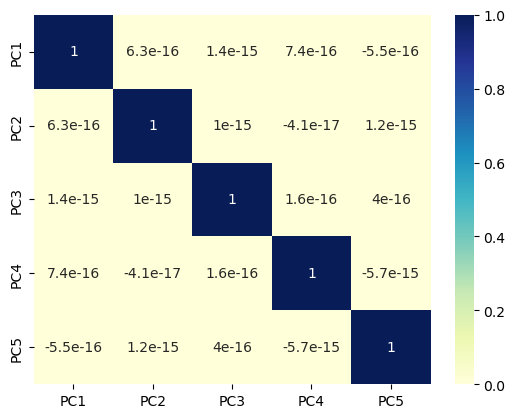

In [404]:
matrix = Mean_PCA_Data.corr()
print("Correlation matrix is : ")
print(matrix)
# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)


<br><br><br>

### 9. ML Model Code

<br><br><br>

### 10. Train the Model

R2_score: 0.9952713195773204


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


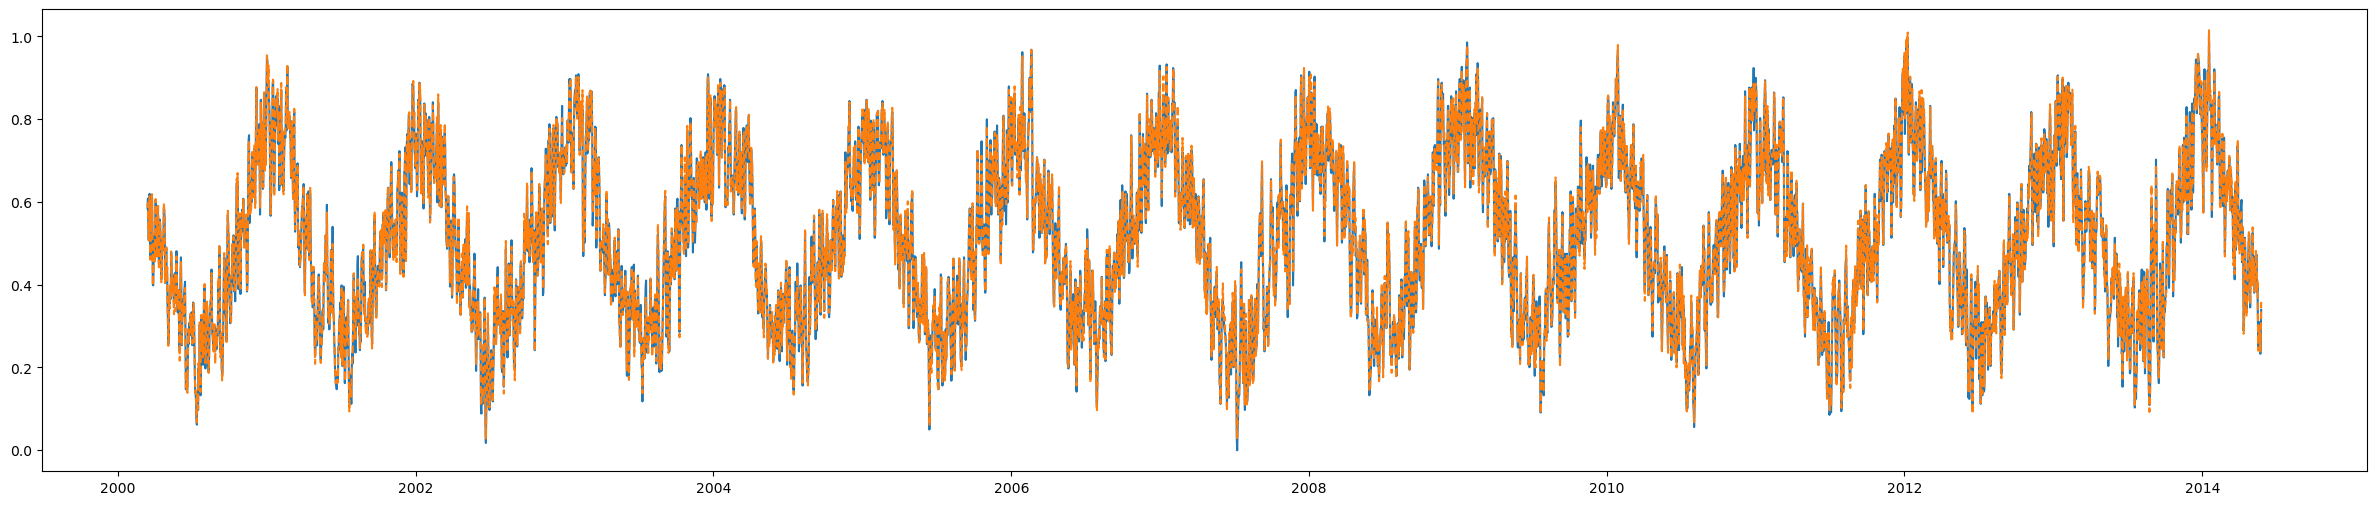

In [409]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # a sklearn library for evaluation metrics, importing R^2 specifically
from sklearn.ensemble import RandomForestRegressor

# to go to
#Temp_Mean_Features = Temp_Mean_Features[["Temp_Max", "Temp_Min"]]
X = Temp_Mean_Features

#X = Mean_PCA_Data

model = LinearRegression()
model.fit(X, Temp_Max_Features["Temp_Mean"])




y_pred = model.predict(X.values.reshape(X.shape[0], -1))
R2_score = r2_score(Temp_Max_Features["Temp_Mean"],y_pred)

print(f"R2_score: {R2_score}")


plt.figure(figsize=(30, 6))
plt.plot(Temp_Mean_Features.index, Temp_Max_Features["Temp_Mean"])
plt.plot(Temp_Mean_Features.index, y_pred,linestyle="--")



R2_score: 0.9898241675555548


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


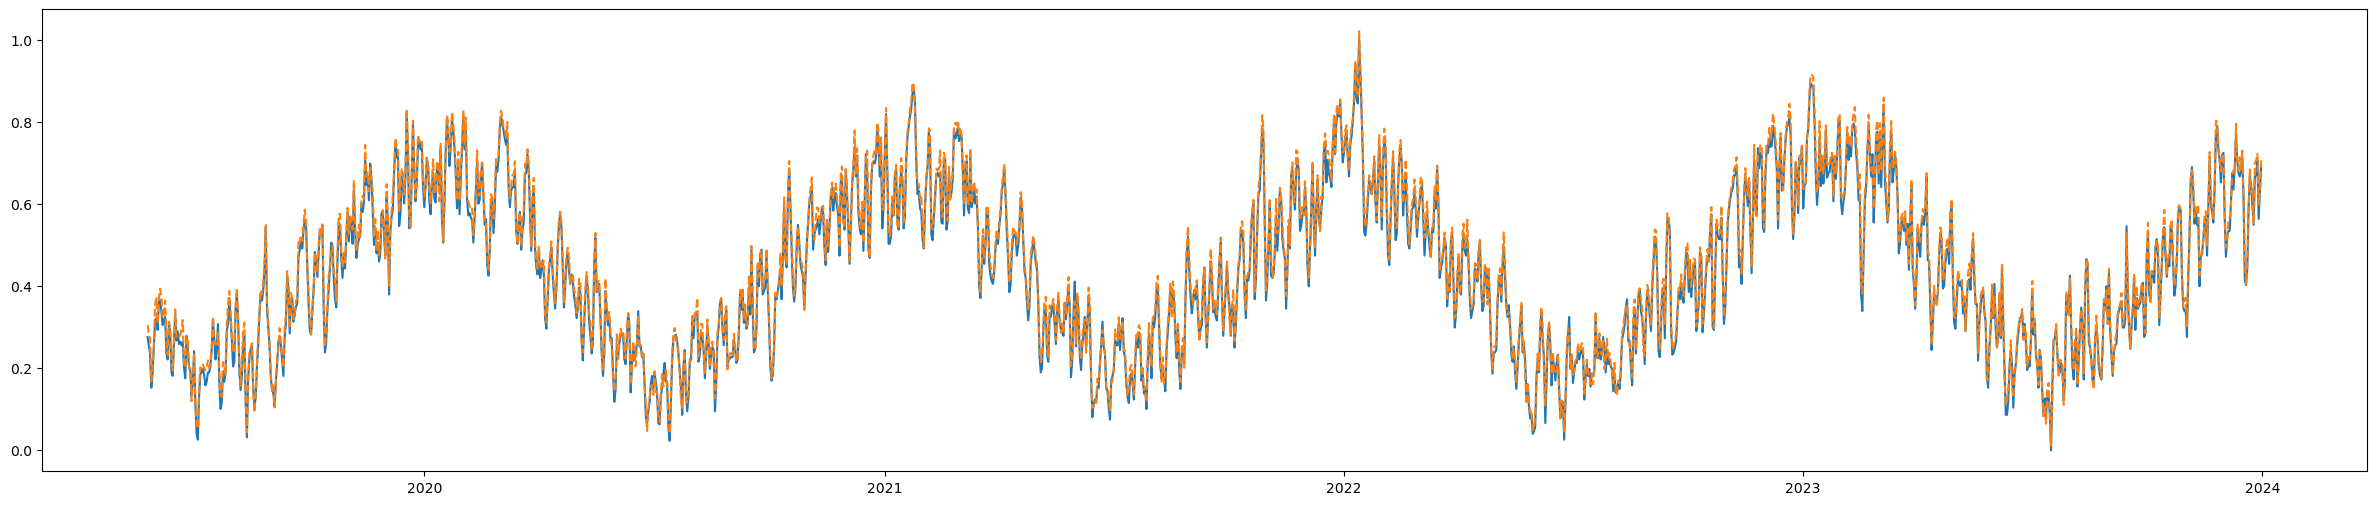

In [410]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # a sklearn library for evaluation metrics, importing R^2 specifically
from sklearn.ensemble import RandomForestRegressor

# to go to

#Test_Temp_Mean_Features = Test_Temp_Mean_Features[["Temp_Max", "Temp_Min"]]
X_Test = Test_Temp_Mean_Features

#X_Test = Test_Mean_PCA_Data
test_y_pred = model.predict(X_Test.values.reshape(X_Test.shape[0], -1))
test_R2_score = r2_score(Test_Temp_Max_Features["Temp_Mean"],test_y_pred)

print(f"R2_score: {test_R2_score}")


plt.figure(figsize=(30, 6))
plt.plot(Test_Temp_Mean_Features.index, Test_Temp_Max_Features["Temp_Mean"])
plt.plot(Test_Temp_Mean_Features.index, test_y_pred,linestyle="--")



<br><br><br>

### 11. Hyperparameter Tuning

In [413]:
Temp_Mean_Features.columns

Index(['Temp_Max', 'Temp_Min', 'Windspeed_Max', 'Windgusts_Max',
       'Sunshine_Duration', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_5', 'SMA', 'EMA',
       'FFT'],
      dtype='object')

<br><br><br>

### 12. Model Evaluation, through evluation metrics and prediction intervals

In [416]:
test_y_pred.shape
#Test_Temp_Max_Features["Temp_Mean"]

(1681,)

<br><br><br>

### 13. Evaluating Goodness of fit, kolmogorov-smirnov or Andirson-Darling test or Shapiro-Wilk test

<br><br><br>

### 14. Consider Data augmentation if there is overfitting